In [45]:
import random
from scipy.stats import poisson

def gen_starttime(totalapp):
    #generate random values from Poisson distribution with mean=mu and sample size=size
#     starttimelist = poisson.rvs(mu=10, size=totalapp)
    starttimelist = [random.randint(0, 1200) for p in range(0, totalapp)]
    print(starttimelist)
    return starttimelist
    
    
def gen_nNodes(totalapp):
    nNodeslist = [random.randint(1, 1) for p in range(0, totalapp)]
    print(nNodeslist)
    return nNodeslist
# def gen_nNodes(totalapp):
#     nNodeslist = [random.randint(1, 4) for p in range(0, totalapp)]
#     print(nNodeslist)
#     return nNodeslist
    
def gen_benchmarkseq(totalapp,benchmarks,benchmarkdistribution,benchmarkcharacteristic):
    shuffledbenchmarks=[]
    for i, benchmark in enumerate(benchmarks):
        for i in range(benchmarkdistribution[i]):
            shuffledbenchmarks.append(f"{benchmark}-{i}")
#     print(shuffledbenchmarks)
    random.shuffle(shuffledbenchmarks)
    print(shuffledbenchmarks)
    
    characteristiclist = []
    for ben in shuffledbenchmarks:
        characteristiclist.append(benchmarkcharacteristic.get(ben.split("-")[0]))
    print(characteristiclist)
    return shuffledbenchmarks,characteristiclist

In [46]:
import csv
import subprocess

header = ['index','benchmark','times','nTasks','nNodes','starttime','characteristic']

def writeCSVExp2Parameters(filename, totalapp, shuffledbenchmarks, nTasks, nNodeslist, startimelist, characteristiclist):

    with open(f"{filename}.csv", "w", encoding="UTF8") as f:
        writer = csv.writer(f)
        writer.writerow(header)
        for i in range(totalapp):
#             print(shuffledbenchmarks[i])
            splitstr = shuffledbenchmarks[i].split("-")
            writer.writerow([i, 
                             splitstr[0], splitstr[1], 
                             nTasks, nNodeslist[i],
                             starttimelist[i],
                             characteristiclist[i]
                            ])
        

In [48]:
#fixed
nTasks = 16
#parameters
# benchmarks = ['hpccfft','hpccdgemm','hpccrandomring','hpccrandomaccess','hpccptrans','hpccstream']
# totalapp = 60
# benchmarkdistribution = [10,10,10,10,10,10]
benchmarks = ['hpccdgemm','nasep','hpccfft','hpccrandomring','hpccstream']
totalapp = 20
benchmarkdistribution = [4,4,4,4,4]
benchmarkcharacteristic = {'hpccfft':'network',
                           'hpccdgemm':'cpu',
                           'hpccrandomring':'network',
                           'hpccrandomaccess':'network',
                           'hpccptrans':'network',
                           'hpccstream':'memory',
                           'nasep':'cpu'}

for times in range(1):
    nNodeslist = gen_nNodes(totalapp)
    shuffledbenchmarks, characteristiclist = gen_benchmarkseq(totalapp, benchmarks, benchmarkdistribution, benchmarkcharacteristic)
    starttimelist = gen_starttime(totalapp)
    writeCSVExp2Parameters(f"exp2parametersS3-{times}", 
                           totalapp,
                           shuffledbenchmarks,
                           nTasks, nNodeslist, starttimelist, characteristiclist)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
['hpccstream-2', 'hpccstream-0', 'hpccrandomring-3', 'nasep-0', 'hpccdgemm-2', 'hpccstream-3', 'hpccrandomring-2', 'hpccdgemm-3', 'hpccstream-1', 'hpccrandomring-1', 'hpccfft-3', 'nasep-3', 'hpccrandomring-0', 'hpccfft-2', 'nasep-2', 'hpccdgemm-0', 'hpccdgemm-1', 'hpccfft-0', 'nasep-1', 'hpccfft-1']
['memory', 'memory', 'network', 'cpu', 'cpu', 'memory', 'network', 'cpu', 'memory', 'network', 'network', 'cpu', 'network', 'network', 'cpu', 'cpu', 'cpu', 'network', 'cpu', 'network']
[553, 154, 896, 704, 564, 272, 472, 651, 853, 717, 654, 165, 1167, 47, 385, 478, 142, 810, 567, 255]


[404, 503, 335, 454, 274, 320, 319, 335, 468, 549, 70, 157, 145, 291, 48, 407, 357, 331, 323, 181]
[404, 503, 335, 454, 274, 320, 319, 335, 468, 549, 70, 157, 145, 291, 48, 407, 357, 331, 323, 181]


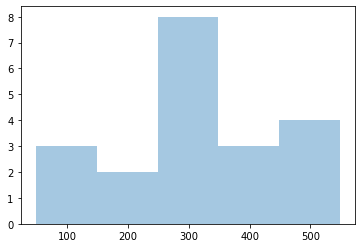

In [39]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
# random.poisson(lam=2, size=1000)
time = gen_starttime(20)
print(time)
sns.distplot(time, kde=False)

plt.show()